# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Задача**
<p> установить какие параметры из вышеуказанных,больше влияют на стоимость квартиры, для дальнейшего автоматического определения рыночной стоимости.</g>


#### Общая информация о таблице

Откроем таблицу и изучим общую информацию о данных.

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.

Выведем общую информацию о таблице, чтобы понять с каким типом данных будем работать в каждом столбце методом info().


In [4]:
import pandas as pd
data = pd.read_csv('real_estate_data_YPP3.csv', sep = '\t')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.shape

(23699, 22)

На текущем этапе типы данных логически соответсвуют названию столбцов.
Всего в данных более 23 тысяч строк и 22 столбца.

В рекомендациях к выполнению проекта указано: построить диаграмму для всех числовых столбцов таблицы на одном графике.
Такие столбцы у нас есть:
3 столбца с целочисленными значениями типа int64
14 столбцов с вещественными, дробными значениями типа float64

#### Изучение количества отсуствующих данных по столбцам

Посмотрим в каких столбцах больше всего пропущенных значений методами isna() и sum()). Чтобы понимать насколько достоверные будут построенные гистограммы и какие мы можем не принимать во внимания из-за большого количества пропусков.

In [4]:
print(data.isna().sum().sort_values(ascending=False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


В большинстве столбцов есть пропущенные значения.
В некоторых столбцах, заполняющихся автоматически, данные отстуствуют в большом количестве строк:
расстрояние до парка/водоема, аэропорта, центра города, количества парков или водоемов в радиусе 3-х км.

Аналогичные пропуски данных присутствуют и в столбцах, которые пользователи заполняли вручную:
апартаменты/количество балконов/высота потолков/площадь жилая и площадь кухни

Что на первый взгляд кажется аномальным - в 3181 строк отсутствуют данные о сроке размещения объявления. Это в дальнейшем стоит проанализировать отдельно.

Следуем рекомендациям и построим гистограмму для всех числовых столбцов таблицы на одном графике.

#### Построение общей диаграммы для таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

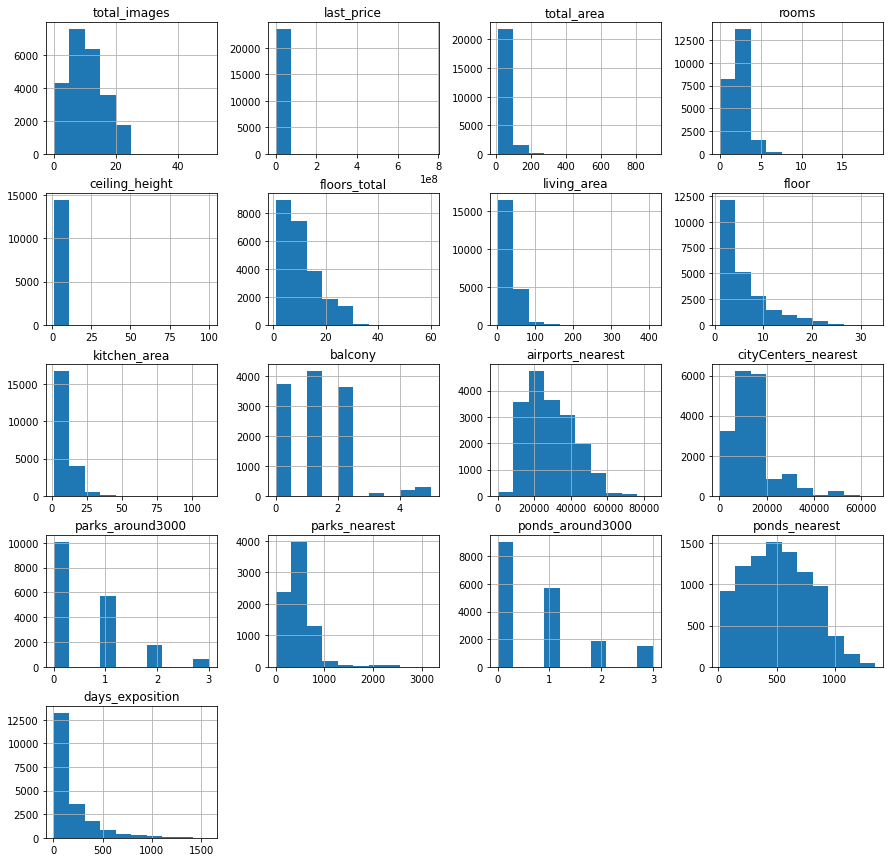

In [5]:
data.hist(figsize=(15, 15))

Не совсем наглядно для анализа ввиду большого количества столбцов, поэтому выстрою для себя отдельные диаграммы, чтобы прописать по каждой анализ по первичным данным. Пойду по порядку, указанному в описании данных:

#### Построение отдельных диаграмм по столбцам

##### Диаграмма для столбца airports_nearest

5542
Пропущено в airports_nearest 23.4% значений


min           0.000000
max       84869.000000
median    26726.000000
mean      28793.672193
Name: airports_nearest, dtype: float64

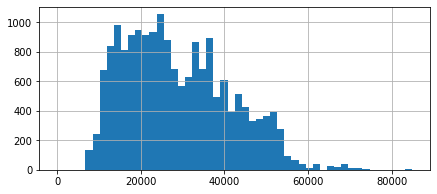

In [6]:
#расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest'].hist(figsize=(7, 3), bins = 50)
print(data['airports_nearest'].isna().sum())
print('Пропущено в airports_nearest {:.1%}'. format(data['airports_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')
data['airports_nearest'].agg(['min', 'max', 'median', 'mean'])

Расстояние от аэропорта 0 метров - настораживает. стоит убрать эту строку из дальнейшего анализа.

<AxesSubplot:>

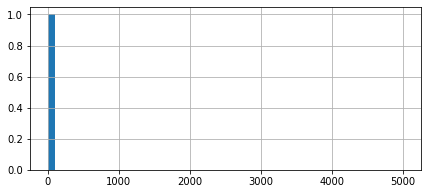

In [7]:
data['airports_nearest'].hist(figsize=(7, 3), bins = 50, range = (0,5000))

Всего один объект, и он находится непосредственно в аэропорте - эти данные стоит изменить в дальнейшем, они скорее ошибочны.

Большинство объектов находятся на расстоянии от 10 до 26 км от аэропорта, 
также достаточно много объектов на расстоянии от 30 до 38 км от аэропорта. Рядом (до 10 км) с аэропортом объектов не представлено, никто не хочет жить под гул самолетов.

Значения не заполнены у 23% объектов этого столбца.

##### Диаграмма для столбца balcony

11519
Пропущено в balcony 48.6% значений


min       0.000000
max       5.000000
median    1.000000
mean      1.150082
Name: balcony, dtype: float64

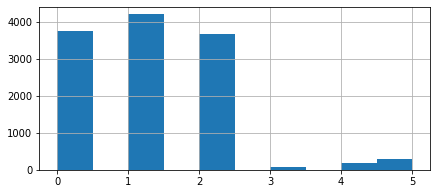

In [8]:
#число балконов
data['balcony'].hist(figsize=(7, 3))
print(data['balcony'].isna().sum())
print('Пропущено в balcony {:.1%}'. format(data['balcony'].isna().value_counts()[1] / len(data), 2) + ' значений')
data['balcony'].agg(['min', 'max', 'median', 'mean'])

Примерно поровну представлено объектов с одним, двумя балконами или без балконов. (из тех данных, где это поле вообще заполнено)
Есть также большие аппартаменты с 3,4 или 5 балконами, как ни странно, оъектов с 5-ю балконами больше, чем с 3-мя или 4-мя.

Значения не заполнены у 48% объектов этого столбца.

##### Диаграмма для столбца ceiling_height

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
2.55     980
2.75     910
2.65     676
3.20     277
3.10     203
Name: ceiling_height, dtype: int64
-----------
min         1.000000
max       100.000000
median      2.650000
mean        2.771499
Name: ceiling_height, dtype: float64
-----------
9195
Пропущено в ceiling_height 38.8% значений


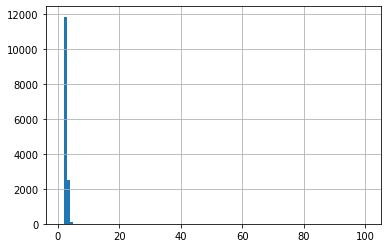

In [9]:
#высота потолков (м)
data['ceiling_height'].hist(bins=100)
print(data['ceiling_height'].value_counts().sort_values(ascending=False).head(10))
print('-----------')
print(data['ceiling_height'].agg(['min', 'max', 'median', 'mean']))
print('-----------')
print(data['ceiling_height'].isna().sum())
print('Пропущено в ceiling_height {:.1%}'. format(data['ceiling_height'].isna().value_counts()[1] / len(data), 2) + ' значений')

<AxesSubplot:>

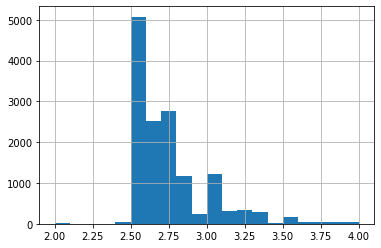

In [10]:
data['ceiling_height'].hist(bins=20, range = (2, 4))

 , это интересно, этот столбец тоже стоит привести в порядок.
Значения не заполнены у 38% объектов этого столбца.

##### Диаграмма для столбца cityCenters_nearest

-----------
5519
min         181.000000
max       65968.000000
median    13098.500000
mean      14191.277833
Name: cityCenters_nearest, dtype: float64
Пропущено в cityCenters_nearest 23.3% значений


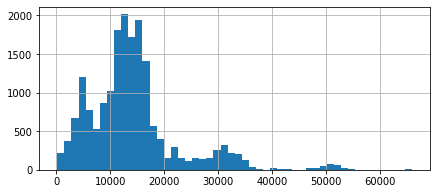

In [11]:
#расстояние до центра города (м)
data['cityCenters_nearest'].hist(figsize=(7, 3), bins = 50)
print('-----------')
print(data['cityCenters_nearest'].isna().sum())
print(data['cityCenters_nearest'].agg(['min', 'max', 'median', 'mean']))
print('Пропущено в cityCenters_nearest {:.1%}'. format(data['cityCenters_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

Большая часть объектов была на расстоянии от центра 11-18 км.
Достаточно много объектов было прямо в центре города и вблизи центра(до 8 км)

Значения не заполнены у 23% объектов этого столбца.

##### Диаграмма для столбца days_exposition

min          1.000000
max       1580.000000
median      95.000000
mean       180.888634
Name: days_exposition, dtype: float64
3181
Пропущено в days_exposition 13.4% значений


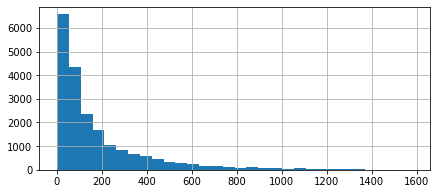

In [12]:
#сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].hist(figsize=(7, 3), bins = 30)
print(data['days_exposition'].agg(['min', 'max', 'median', 'mean']))
print(data['days_exposition'].isna().sum())
print('Пропущено в days_exposition {:.1%}'. format(data['days_exposition'].isna().value_counts()[1] / len(data), 2) + ' значений')

По такой диаграмме сложно сделать однозначные выводы.
Можно только сказать, что большинство объявлений закрывались в переделах 3-4 месяцев.
Но есть и такие, которые вероятно публиковались уже не первый год.
Единично - несколько лет.

Значения не заполнены у 13% объектов этого столбца.


Посмотрим поближе основную массу объявлений закрытых быстрее полугода.

<AxesSubplot:>

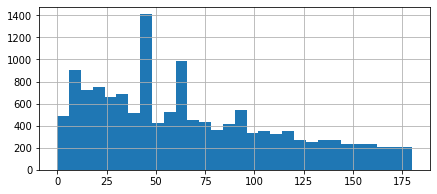

In [13]:
#сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].hist(figsize=(7, 3), bins = 30, range = (0, 180))

Предыдущие выводы подтверждаются, но также видим несколько пиков по срокам закрытия объявлений - 40-45 дней и 58-62 дня.

Предполагаю следующие причины:

- объявления автоматически снимаются в эти установленные даты (закрываются. 45 дней на бесплатном размещении, 60 на платном)
- есть план по срокам продаж или иные KPI в каких-то крупных риелторских агенствах, например есть компания Этажи, где сделка должна быть закрыта в срок до 60 дней по договору.

##### Диаграмма для столбца floor

2    3368
3    3073
1    2917
4    2804
5    2621
Name: floor, dtype: int64
0
0.0
min        1.000000
max       33.000000
median     4.000000
mean       5.892358
Name: floor, dtype: float64


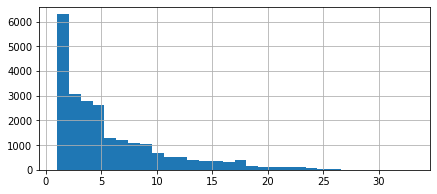

In [14]:
#этаж
data['floor'].hist(figsize=(7, 3), bins = 30)
print(data['floor'].value_counts(ascending=False).head())
print(data['floor'].isna().sum())
print(data['floor'].isna().sum()/ len(data))

print(data['floor'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений о продаже были по квартирам, находящимся на 1-5-ом этажах.
Второй по величине является группа с объектами на 6- 9 этажах.
Столбец не имеет незаполненных значений.

##### Диаграмма для столбца floors_total

86
Пропущено в floors_total 0.4% значений
min        1.000000
max       60.000000
median     9.000000
mean      10.673824
Name: floors_total, dtype: float64


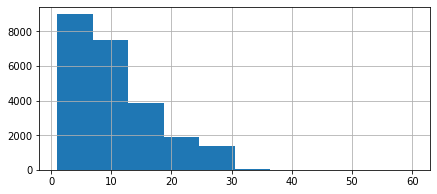

In [15]:
#всего этажей в доме
data['floors_total'].hist(figsize=(7, 3))
print(data['floors_total'].isna().sum())

print('Пропущено в floors_total {:.1%}'. format(data['floors_total'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['floors_total'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений о продаже были в 5-ти этажных домах и высотках до 12 этажей.
Столбец имеет кране низкую долю незаполненных значений <1%

##### Диаграмма для столбца kitchen_area

0.09612219924891345
Пропущено в kitchen_area 9.6% значений
min         1.300000
max       112.000000
median      9.100000
mean       10.569807
Name: kitchen_area, dtype: float64


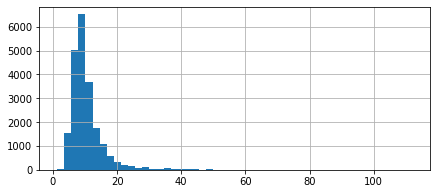

In [16]:
#площадь кухни в квадратных метрах (м²)
data['kitchen_area'].hist(figsize=(7, 3), bins = 50)
print(data['kitchen_area'].isna().sum() / len(data['kitchen_area']))

print('Пропущено в kitchen_area {:.1%}'. format(data['kitchen_area'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['kitchen_area'].agg(['min', 'max', 'median', 'mean']))

Большинство объявлений были с метражом кухни от 4 до 15 м2.
Столбец имеет кране низкую долю незаполненных значений <1%

##### Диаграмма для столбца living_area

0.08029874678256467
Пропущено в living_area 8.0% значений
min         2.000000
max       409.700000
median     30.000000
mean       34.457852
Name: living_area, dtype: float64


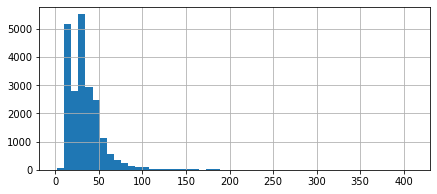

In [17]:
#жилая площадь в квадратных метрах (м²)
data['living_area'].hist(figsize=(7, 3), bins = 50)
print(data['living_area'].isna().sum() / len(data['living_area']))
print('Пропущено в living_area {:.1%}'. format(data['living_area'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['living_area'].agg(['min', 'max', 'median', 'mean']))

<AxesSubplot:>

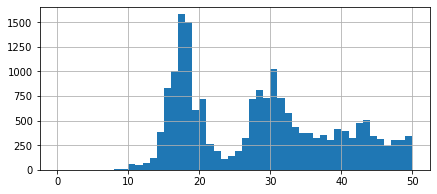

In [18]:
#посмотрим ближе интересующую нас область с пиковыми значениями
data['living_area'].hist(figsize=(7, 3), bins = 50, range = (0,50))

Наблюдаем, что в представленной выборке было больше всех продано квартир с площадью от 15 до 18 м2,
а также с площадью от 27 до 33 м2.

Основная часть данных содержит информацию о продаже квартир с площадью 15 до 50 м2.
Вероятно, это студии, одно или двухкомнатные квартиры.

Столбец имеет кране долю незаполненных значений 8%

##### Диаграмма для столбца parks_around3000

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
5518
Пропущено в parks_around3000 23.3% значений


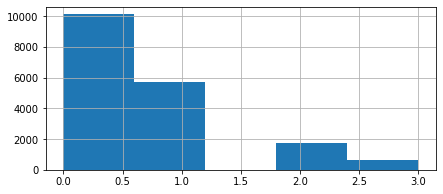

In [19]:
#число парков в радиусе 3 км
data['parks_around3000'].hist(figsize=(7, 3), bins = 5)
print(data['parks_around3000'].value_counts(ascending=False))

print(data['parks_around3000'].isna().sum())

print('Пропущено в parks_around3000 {:.1%}'. format(data['parks_around3000'].isna().value_counts()[1] / len(data), 2) + ' значений')

В большинстве указанных данных по объектам - парков рядом нет.
В 5681 объектах рядом 1 парк, в 1747 - 2, и у 647 объектов рядом два парка.
Значения не заполнены у 23% объектов этого столбца.

##### Диаграмма для столбца parks_nearest

15620
Пропущено в parks_nearest 65.9% значений
min          1.000000
max       3190.000000
median     455.000000
mean       490.804555
Name: parks_nearest, dtype: float64


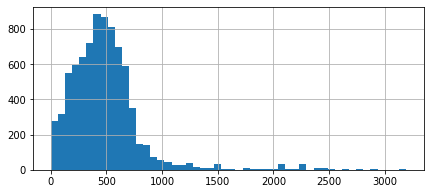

In [20]:
#расстояние до ближайшего парка (м)
data['parks_nearest'].hist(figsize=(7, 3), bins = 50)
print(data['parks_nearest'].isna().sum())

print('Пропущено в parks_nearest {:.1%}'. format(data['parks_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

print(data['parks_nearest'].agg(['min', 'max', 'median', 'mean']))

В большинстве указанных данных по объектам - ближайший парк находится на расстоянии от 200 до 700 метров.
Значения не заполнены у 66% объектов этого столбца, скорее всего, данные не могли быть заполнены относительно случаев с 0 парков вокруг дома.

##### Диаграмма для столбца ponds_around3000

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
5518
Пропущено в ponds_around3000 23.3% значений


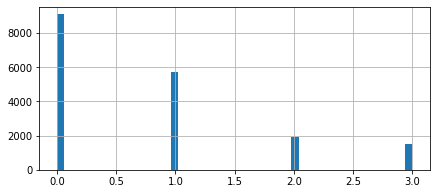

In [21]:
#число водоёмов в радиусе 3 км
data['ponds_around3000'].hist(figsize=(7, 3), bins = 50)
print(data['ponds_around3000'].value_counts(ascending=False))

print(data['ponds_around3000'].isna().sum())
print('Пропущено в ponds_around3000 {:.1%}'. format(data['ponds_around3000'].isna().value_counts()[1] / len(data), 2) + ' значений')

В выборке большую часть объектов представлено без доступности к водоемам.
Почти у 6000 квартир рядом есть 1 водоем, у 2000 есть рядом два водоема и 1501 объекта рядом целых 3 водоема.
Столбец имеет 23% незаполненных значений.

У нас бОльшая часть объектов - продавалась возле парков, однако большая часть данных в стобце с количеством парков = 0. Это стоит поисследовать дальше, возможно, закралась ошибка в выгрузке. 

##### Диаграмма для столбца ponds_nearest

14589
Пропущено в ponds_nearest 61.6% значений


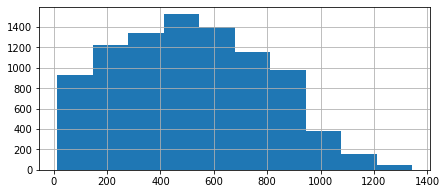

In [22]:
#расстояние до ближайшего парка (м)
data['ponds_nearest'].hist(figsize=(7, 3), bins = 10)
print(data['ponds_nearest'].isna().sum())
print('Пропущено в ponds_nearest {:.1%}'. format(data['ponds_nearest'].isna().value_counts()[1] / len(data), 2) + ' значений')

Из тех квартир, которые имеют рядом водоем  - почти все находятся на расстоянии 1 км от ближайшего водоема.
Однако, у 61% данных в столбце данные неуказаны.
Это почти в три раза больше, чем количество тех объектов, где отсуствуют значения о количестве водоемов рядом.

##### Диаграмма для столбца rooms

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64
0.0
min        0.000000
max       19.000000
median     2.000000
mean       2.070636
Name: rooms, dtype: float64


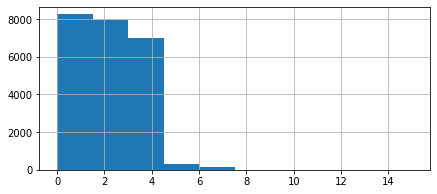

In [23]:
#число комнат
data['rooms'].hist(figsize=(7, 3), range = (0, 15))
print(data['rooms'].value_counts(ascending=False))
print(data['rooms'].isna().sum() / len(data['rooms']))
print(data['rooms'].agg(['min', 'max', 'median', 'mean']))

<AxesSubplot:>

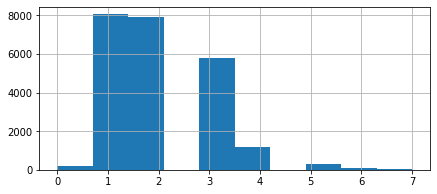

In [24]:
#посмотрим на те объекты, которых более 100 в группе(комнатности)
data['rooms'].hist(figsize=(7, 3), range = (0, 7))

Почти в равной степени представлены однокомнтаные и двух комнатные квартиры в нашей выборке.
Почти 6000 из 23000 это трех комнатные квартиры, почти 1200 четрырехкомнатные квартиры.
Многокомнатные квартиры представлены числом на порядок ниже.
Мы видили в первой большой гистограмме большое количество незаполенных данных по столбцу studio, в дальнейшем можем их заполнить, т.к. нам известна комнатность квартир.
Настораживает только наличие квартир с 0 комнат, следует это будет обработать в дальнейшем, чтобы выводы были более понятны заказчику.

##### Диаграмма для столбца total_area

0.0
min        12.000000
max       900.000000
median     52.000000
mean       60.348651
Name: total_area, dtype: float64


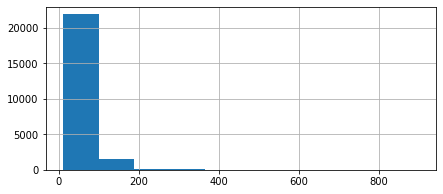

In [25]:
#общая площадь квартиры в квадратных метрах (м²)
data['total_area'].hist(figsize=(7, 3))
print(data['total_area'].isna().sum() / len(data['total_area']))
print(data['total_area'].agg(['min', 'max', 'median', 'mean']))

Интересный объект в выборке. Квартира площадью в 900 м2.
Придется укрупнить гистограмму.

<AxesSubplot:>

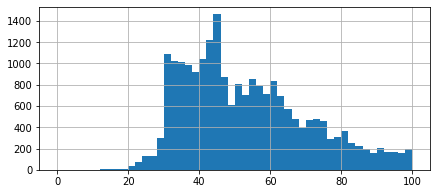

In [26]:
data['total_area'].hist(figsize=(7, 3), range = (0, 100), bins = 50)

Большая часть объектов представлена с общей площадью от 30 до 75 м2.
Есть два пика, видимо типовых застроек, с наибольшим количеством объектов жилой площадью: 33 м2 и 44-46 м2.
Столбец не имеет незаполненных значений.

##### Вывод к первому шагу исследования

Вывод к первому шагу исследования
В первом шаге согласно инструкции было необходимо выполнить следующие действия:

Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/real_estate_data.csv
    
Скачать датасет
    
Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
    
Изучите общую информацию о полученном датафрейме.
    
Постройте гистограмму для всех числовых столбцов таблицы на одном графике.

Все вышеуказанные действия выполнены.
    
На основании построенных диаграмм можно сделать выводы:

Большинство объектов находятся на расстоянии от 10 до 26 км от аэропорта, 
также достаточно много объектов на расстоянии от 30 до 38 км от аэропорта. 
Рядом (до 10 км) с аэропортом объектов не представлено.
Примерно поровну представлено объектов с одним, двумя балконами или без балконов. (из тех данных, где это поле вообще заполнено).Есть также большие аппартаменты с 3,4 или 5 балконами, как ни странно, оъектов с 5-ю балконами больше, чем с 3-мя или 4-мя.
Большая часть данных у нас входит в стандартные высоты потолков 2.5 - 3.3 Но есть и объекты с более высокими потолками, они, скорее, единичные.
Большая часть объектов была на расстоянии от центра 11-18 км. Достаточно много объектов было прямо в центре города и вблизи центра(до 8 км)
Большинство объявлений закрывались в переделах 3-4 месяцев.
Но есть и такие, которые вероятно публиковались уже не первый год.
Большинство объявлений о продаже были по квартирам, находящимся на 1-5-ом этажах.
Второй по величине является группа с объектами на 6-9 этажах.
Большинство объявлений о продаже были в 5-ти этажных домах и высотках до 12 этажей.
Большинство объявлений были с метражом кухни от 4 до 15 м2.
Больше всех продано квартир с жилой площадью от 15 до 18 м2, а также с площадью от 27 до 33 м2.
Основная часть данных содержит информацию о продаже квартир с общей площадью 15 до 50 м2.
В большинстве указанных данных по объектам - парков рядом нет.
В 5681 объектах рядом 1 парк, в 1747 - 2, и у 647 объектов рядом два парка, ближайший парк находится на расстоянии от 200 до 700 метров.
В выборке большую часть объектов представлено без доступности к водоемам.
Почти у 6000 квартир рядом есть 1 водоем, у 2000 есть рядом два водоема и 1501 объекта рядом целых 3 водоема. Из тех квартир, которые имеют рядом водоем  - почти все находятся на расстоянии 1 км от ближайшего водоема.
Почти в равной степени представлены однокомнтаные и двух комнатные квартиры в нашей выборке.
Почти 6000 из 23000 это трех комнатные квартиры, 1200 четрырехкомнатные квартиры.
Многокомнатные квартиры представлены числом на порядок ниже.
Большая часть объектов представлена с общей площадью от 30 до 75 м2. Есть два пика, видимо типовых застроек, с наибольшим количеством объектов жилой площадью: 33 м2 и 44-46 м2.    
    
    
Так как в некоторых столбцах отсутствует часть данных - заполним их там где это возможно наиболее вероятными и подходящими значениями в шаге 2.

<div 

### Предобработка данных

Цитата из инструкции к выполнения проекта:

Шаг 2. Предобработка данных
Найдите и изучите пропущенные значения в столбцах: Определите, в каких столбцах есть пропуски.
Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
Рассмотрите типы данных в каждом столбце:
Найдите столбцы, в которых нужно изменить тип данных.
Преобразуйте тип данных в выбранных столбцах.
В ячейке с типом markdown поясните, почему нужно изменить тип данных.
Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

#### Выявление аномальных отклонений по стандратному отклонению

Посмотрим общую информацию о таблице еще раз, чтобы выявить std - отклонение от среднего и понять однородность данных в столбцах

In [27]:
data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [28]:
data.describe().astype('float')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице есть данные, которые сильно выбиваются из общей массы по значениям, значит основную долю внимания придётся уделить пропущенным или отсутствующим значениям в таблице и на исправление, отбросывание аномальных значений.

#### Обработка столбца last_price

изменим тип данных в столбце на тип int для удобства просмотра

In [29]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

Проверим какие значения можно убрать из анализа, чтобы они не искажали статистику по остальным критериям оценки

In [30]:
# создаем функцию определяющую категорию стоимости объекта()
def categorize_last_price(i):
    if i <= 1000000:
        return('до 1 миллиона')
    if i <= 8000000:
        return('до 8 миллионов')
    if i <= 16000000:
        return('до 16 миллионов')
    if i <= 25000000:
        return('до 25 миллионов')
    if i <= 50000000:
        return('до 50 миллионов')
    if i <= 80000000:
        return('до 80 миллионов')
    if i <= 100000000:
        return('до 100 миллионов')
    if i <= 150000000:
        return('до 150 миллионов')
    if i <= 200000000:
        return('до 200 миллионов')   
    if i <= 2500000000:
        return('до 250 миллионов')
    if i <= 3000000000:
        return('до 300 миллионов')
    if i <= 4000000000:
        return('до 400 миллионов')    
    if i > 4000000000:
        return('выше 400 миллионов')


data['last_price_category'] = data['last_price'].apply(categorize_last_price)
print(data['last_price_category'].value_counts().sort_values())

до 200 миллионов        6
до 250 миллионов        9
до 100 миллионов       22
до 150 миллионов       22
до 80 миллионов        72
до 1 миллиона         245
до 50 миллионов       333
до 25 миллионов       601
до 16 миллионов      3130
до 8 миллионов      19259
Name: last_price_category, dtype: int64


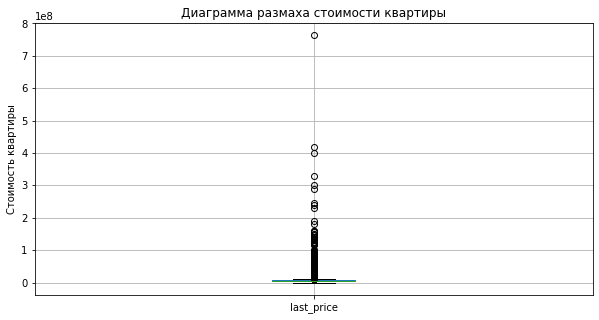

In [31]:
import matplotlib.pyplot as plt

data.boxplot(column=['last_price'], figsize=(10,5), grid=True)
plt.ylabel('Стоимость квартиры')
plt.title('Диаграмма размаха стоимости квартиры')
plt.show()

In [32]:
#дропнем эти строки из дальнейшего анализа, чтобы квартиры с очень высокими ценами не влияли на статистику
data.drop(data[data['last_price'] >= 150000000].index, inplace = True)

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 16 миллионов
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,до 8 миллионов
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 8 миллионов
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,до 80 миллионов
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,до 16 миллионов


#### Исследование столбца first_day_exposition

В теории на тренажере мы начинали с приведения данных о дате и времени к определенному формату.
Сейчас столбце first_day_exposition имеет тип object.
Сделаем для визуального удобства из него тип datetime.

In [34]:
#приведем значения к формату %Y-%m-%dT%H:%M:%S

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


In [35]:
print(data['first_day_exposition'].min())
print(data['first_day_exposition'].max())
#проверим за какой период у нас есть данные в выгрузке

2014-11-27 00:00:00
2019-05-03 00:00:00


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23682 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23682 non-null  int64         
 1   last_price            23682 non-null  int64         
 2   total_area            23682 non-null  float64       
 3   first_day_exposition  23682 non-null  datetime64[ns]
 4   rooms                 23682 non-null  int64         
 5   ceiling_height        14494 non-null  float64       
 6   floors_total          23596 non-null  float64       
 7   living_area           21781 non-null  float64       
 8   floor                 23682 non-null  int64         
 9   is_apartment          2774 non-null   object        
 10  studio                23682 non-null  bool          
 11  open_plan             23682 non-null  bool          
 12  kitchen_area          21407 non-null  float64       
 13  balcony         

Столбец first_day_exposition был приведен к формату: '%Y-%m-%dT%H:%M:%S'

#### Исследование значений в столбце days_exposition 

Проверим какие объекты у нас выводятся, в которых количество дней размещения не указано.

In [37]:
data[data['days_exposition'].isnull() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 16 миллионов
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,до 8 миллионов
44,13,5350000,40.00,2018-11-18,1,NaN,22.0,NaN,3,NaN,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,до 8 миллионов
45,17,5200000,50.60,2018-12-02,2,2.65,9.0,30.3,7,NaN,...,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,до 8 миллионов
46,17,6600000,52.10,2019-01-31,2,2.60,24.0,29.7,9,NaN,...,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,до 8 миллионов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145.00,2018-11-02,4,3.00,26.0,71.4,17,NaN,...,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,до 25 миллионов
23685,15,2490000,31.00,2019-01-24,1,2.50,5.0,17.3,5,NaN,...,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,до 8 миллионов
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,до 16 миллионов
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,до 8 миллионов


Предположение, что отсуствующие значения в данном столбце могут означать, что объявление еще публикуется - не может быть верно, т.к. имеется заполненный столбец last_price цена на момент снятия с публикации.
Значит они уже закрыты или нужно запросить более подброное описание для столбца last_price.

Заменить их на = "публикуется" мы не можем.

Заменить их на 0 дней мы тоже не можем, нет никаких предпосылок к тому, что объявления были сняты день в день.

#### Исследование значений в столбце airports_nearest 

Продолжим исследование данных по столбцам, которые заполняются автоматической системой.
Проверим столбец, определяющий расстояние до ближайшего аэропорта в метрах (м)
Помним, что ранее мы обнаружили объект, который находился прямо в аэропорте. Исправим эту единичную ошибку в данных

In [38]:
data.query('airports_nearest == 0')
#повторим проверку с количеством объектов у аэропорта, ожидаем 1 строку

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
21085,0,7000000,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,до 8 миллионов


In [39]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
data.query('airports_nearest == 0')
#заменим 0 на None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category


In [40]:
data['airports_nearest'].min()
#проверим минимальное значение удаленности объектов от аэропорта

6450.0

Ближайший объект теперь находится на расстоянии 6,5 км от аэропорта - эти данные уже выглядят достовернее.

#### Исследование значений в столбце parks_around3000 толбце parks_nearest

Помним, что ранее мы обнаружили объекты, в которых данные по столбцу parks_around3000 отсуствовали.Для более детального анализа нужно будет вернуться к первому шагу изучения данных по двум столбцам: parks_around3000 и  parks_nearest

In [41]:
print(data['parks_around3000'].isna().sum()) # количество квартир с парками в 3 км без записей
print(data['parks_nearest'].notnull().sum()) #количество всех строк с naрками в колонке растояние до парка

5518
8068


In [42]:
data.query('parks_nearest < 3000')
#посмотрим на строки, где расстояние до парка меньше 3-х км

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,до 16 миллионов
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,до 8 миллионов
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,до 80 миллионов
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,до 16 миллионов
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.3,3,NaN,...,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,до 8 миллионов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,до 8 миллионов
23690,3,5500000,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,до 8 миллионов
23693,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,до 8 миллионов
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,до 16 миллионов


In [43]:
# количество квартир с парками в 3 км
print(data[data['parks_around3000']==0].count().values[0])
#mean_data_parks=data.query('parks_nearest > 3000')['parks_nearest'].mean()
#print(mean_data_parks)

10100


In [44]:
#data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
'''можно было бы заменить пропущенные данные в столбце parks_around3000 на 0,
но это будет сильно искажать анализ в дальнейшем, т.к. таких значений будет существенное количество.'''

'можно было бы заменить пропущенные данные в столбце parks_around3000 на 0,\nно это будет сильно искажать анализ в дальнейшем, т.к. таких значений будет существенное количество.'

Можно предположить, что количество отсутствующих значений по приближённости парка говорит о том, что необходимо проверить наличие проблемы в выгрузке данных из программы, т.к. по столбцу о количестве парков на расстоянии < 3 км значения заполнены.

Можно предположить, что в тех строках, где незаполненные данные по количеству парков до 3-х км данные отсуствуют по причине того, что в этом радиусе нет парков. Но принимая во внимание мою гипотезу выше - мы не можем быть уверены, что это так, так как причиной могут служить проблемы в выгрузке данных из программы

#### Исследование значений в столбце ponds_around3000

Проверим столбец, определяющий число водоемов в радиусе 3 км.
Помним, что ранее мы обнаружили объекты, в которых данные по этому столбцу отсуствовали.

In [45]:
data['ponds_around3000'].isna().sum()

5518

Делаю предположение, что данные отсуствуют из-за того, что рядом водоемов нет, это видится для меня наиболее вероятным.
Выполним замену отсутствующих значений на "0" и изменим тип данных на целочисленный и проверим результат

In [46]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
#замена пропущенных значений на 0 и изменение типа данных

In [47]:
data['ponds_around3000'].isna().sum()
#проверяем как отработало

0

#### Исследование значений в столбце ponds_nearest

In [48]:
data['ponds_nearest'].isna().sum()

14588

Больше половины данных не имеют значений, делаю предположение, что водоёмов по близости 3км нет и такие данные заполнять какими-либо значениями опасно, учитывая объем отсуствующих значений, они могут сильно исказить результат исследования.

#### Корректировка названия столбца cityCenters_nearest

В предыдущем проекте мы приводили названия колонок к одному виду, повторим эту операцию с данной колонкой методом rename

In [49]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

In [50]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'last_price_category'],
      dtype='object')

Теперь названия столбцов собранных автоматически - имеют единый формат.

#### Исследование значений в столбце is_apartment

Проверим какие значения у нас хранит этот столбец

In [51]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Нас интересуют строки, где есть nan в данном столбце

In [52]:
data.loc[data['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN,до 16 миллионов
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0,NaN,81.0,до 8 миллионов
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2,574.0,558.0,до 8 миллионов
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3,234.0,424.0,до 80 миллионов
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1,48.0,121.0,до 16 миллионов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3,381.0,NaN,до 16 миллионов
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,Тосно,NaN,NaN,NaN,NaN,0,NaN,45.0,до 8 миллионов
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,0,NaN,NaN,до 8 миллионов
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3,196.0,602.0,до 16 миллионов


Из открытых источников я выяснила, что аппартаменты можно сдать в поднаем, обменять на другие и даже зарегистрировать других жильцов. Продать или подарить такие помещения нельзя, совершать сделки с квартирой разрешат только после приватизации. Логичнее будет заменить отсуствующие значения в этом столбце на False.

In [53]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим результат

In [54]:
data['is_apartment'].unique()

array([False,  True])

#### Обработка столбца rooms

Проверим сколько объектов у нас были "без комнат", т.е. значения в столбце были = 0

In [55]:
data.query('rooms == 0')['rooms'].count()

197

Ого, в 197 объектах отсутствуют комнаты. Стоит проверить эти объекты на правомерность размещения.

In [56]:
data.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,181.0,до 8 миллионов
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.00,1,False,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,0,NaN,45.0,до 8 миллионов
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,...,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2,982.0,64.0,до 8 миллионов
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.30,19,False,...,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1,593.0,430.0,до 8 миллионов
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,...,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,0,NaN,29.0,до 8 миллионов
697,12,2500000,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,...,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,0,NaN,201.0,до 8 миллионов
716,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,...,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0,NaN,40.0,до 8 миллионов
780,9,2600000,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,...,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,45.0,до 8 миллионов
839,14,1900000,35.00,2017-04-14,0,2.70,5.0,15.00,3,False,...,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,0,NaN,7.0,до 8 миллионов
946,5,2200000,23.00,2016-09-27,0,NaN,27.0,18.00,7,False,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,483.0,до 8 миллионов


Небольшая жилая и общая площадь, цена, отсуствие кухонной площади говорит нам о том, что это скорее всего квартиры-студии.

In [57]:
print(data.loc[data['rooms'] == 0, 'studio'])

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 197, dtype: bool


Однако не везде, где количество комнат = 0 - значение studio = True
Изменим это и проверим результат.

In [58]:
data.loc[data['rooms'] == 0, 'studio'] = 'True'
print(data.loc[data['rooms'] == 0, 'studio'])

144      True
349      True
440      True
508      True
608      True
         ... 
23210    True
23442    True
23554    True
23592    True
23637    True
Name: studio, Length: 197, dtype: object


In [59]:
data['rooms'] = data['rooms'].replace(0, 1)

In [60]:
data.query('rooms == 0')['rooms'].count()

0

Все получилось, теперь у нас нет квартир с нулем комнат.

In [61]:
data['rooms'].value_counts()

1     8244
2     7939
3     5812
4     1177
5      323
6      102
7       57
8       10
9        8
10       3
11       2
14       2
16       1
19       1
15       1
Name: rooms, dtype: int64

Самые редкие квартиры - многокомнатные. Свыше 9 комнат в квартире, полагаю их можно исключить из анализа.

In [62]:
data.drop(data[data['rooms'] >= 9].index, inplace = True)

#### Исследование значений в столбце ceiling_height

Уберем аномальные данные из столбца с высотой потолков и заменим их на медианные

In [63]:
mean_ceiling_height = data.query('ceiling_height > 2 and ceiling_height < 5')['ceiling_height'].mean()
print(mean_ceiling_height)

2.7249268833599003


In [64]:
median_ceiling_height = data.query('ceiling_height > 2 and ceiling_height < 5')['ceiling_height'].median()
print(median_ceiling_height)

2.65


Изучив данные из открытых источников - выяснила, что средняя высота потолка составляет 265 см - что соответствует нашему медианному расчету, но так как мы исследуем Санкт-Петербург, известный своими высокими потолками - мы возьмем для замены значение, которое у нас получилось больше - среднее.

Заменим наши аномальные значения и проверим

In [65]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = mean_ceiling_height
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = mean_ceiling_height

print(data['ceiling_height'].min())
print(data['ceiling_height'].max())

2.0
5.0


Теперь у нас нет аномально низких и аномально высоких потолков. Заменять пустые данные медианными значениями не рискну, т.к. таких значений очень много, что может существенно исказить анализ.

#### Обработка столбца balcony

Вспомним, сколько данных отсуствуют по балконам

In [66]:
data['balcony'].isna().sum()

11500

Это почти половина данных столбца. Стоит выяснить что это за объекты, возможно мы можем указать для них подходящие значения

In [67]:

data.loc[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2,755.0,NaN,до 16 миллионов
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1,48.0,121.0,до 16 миллионов
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,0,NaN,55.0,до 8 миллионов
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,189.0,до 8 миллионов
10,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2,553.0,137.0,до 8 миллионов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000,30.00,2017-07-07,1,NaN,5.0,17.50,4,False,...,NaN,Тихвин,NaN,NaN,NaN,NaN,0,NaN,413.0,до 8 миллионов
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.30,3,False,...,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3,381.0,NaN,до 16 миллионов
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.00,4,False,...,NaN,Тосно,NaN,NaN,NaN,NaN,0,NaN,45.0,до 8 миллионов
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.70,1,False,...,NaN,село Рождествено,NaN,NaN,NaN,NaN,0,NaN,NaN,до 8 миллионов


Судя по распределению данных, логично было бы предположить, что те данные которые имеют пропуск - это означает отсутствие балкона, таким образом можем указать 0 вместо NaN.
Да и в самой инструкции к выполнению проекта была подсказка: Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0.
Последуем ей, установим 0 вместо NaN и укажем формат целочисленных значений в столбце.

In [68]:
data['balcony']=data['balcony'].fillna(0).astype('int')
#замена данных на 0 и изменение типа данных

Проверим результат замены данных

In [69]:
data['balcony'].isna().sum()
#проверка

0

#### Изменение типа данных в столбце floors_total

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23664 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23664 non-null  int64         
 1   last_price            23664 non-null  int64         
 2   total_area            23664 non-null  float64       
 3   first_day_exposition  23664 non-null  datetime64[ns]
 4   rooms                 23664 non-null  int64         
 5   ceiling_height        14479 non-null  float64       
 6   floors_total          23578 non-null  float64       
 7   living_area           21764 non-null  float64       
 8   floor                 23664 non-null  int64         
 9   is_apartment          23664 non-null  bool          
 10  studio                23664 non-null  object        
 11  open_plan             23664 non-null  bool          
 12  kitchen_area          21390 non-null  float64       
 13  balcony         

Приведем столбец к целочисленным значениям, для этого потребуюется убрать те строки, где этажность неизвестна.
Для начала оценим насколько они малочисленны

In [71]:
data['floors_total'].isna().sum()

86

86 из 23000 незначительно повлияют на исследование, удалим их

In [72]:
data.dropna(subset=['floors_total'], inplace=True)

In [73]:
data['floors_total']=data['floors_total'].astype('int')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

Мы привели столбец этажности домов к целочисленным значениям.

#### Исследование значений в столбцах total_area, living_area и kitchen_area

Проанализируем какие значения у нас в столбце total_area могут быть аномальными

In [74]:
# создаем функцию определяющую категорию стоимости объекта()
def categorize_total_area(i):
    if i <= 20:
        return('до 20 м')
    if i <= 30:
        return('до 30 м')
    if i <= 50:
        return('до 50 м')
    if i <= 75:
        return('до 75 м')
    if i <= 100:
        return('до 100 м')
    if i <= 150:
        return('до 150 м')
    if i <= 250:
        return('до 250 м')
    if i <= 400:
        return('до 400 м')
    if i <= 600:
        return('до 600 м')
    if i <= 800:
        return('до 800 м')
    if i >= 800:
        return('выше 800')

data['total_area_category'] = data['total_area'].apply(categorize_total_area)
print(data['total_area_category'].value_counts().sort_values())

до 800 м        2
до 600 м       14
до 20 м        35
до 400 м       72
до 250 м      440
до 30 м       853
до 150 м     1262
до 100 м     2765
до 75 м      7844
до 50 м     10291
Name: total_area_category, dtype: int64


Строки с огромными квартирами, площадью >= 800 м встречаются всего дважды, предполагаю их можно исключить.

In [75]:
data.drop(data[data['total_area'] >= 800].index, inplace = True)

Проверим много ли у нас пропущенных значений в этих столбцах living_area и kitchen_area

In [76]:
print(data['living_area'].isna().sum())
print('Пропущено в living_area {:.1%}'. format(data['living_area'].isna().value_counts()[1] / len(data), 2) + ' значений')
#вспомним сколько у нас пропущено значений в этих столбцах

print(data['kitchen_area'].isna().sum())
print('Пропущено в kitchen_area {:.1%}'. format(data['kitchen_area'].isna().value_counts()[1] / len(data), 2) + ' значений')

1867
Пропущено в living_area 7.9% значений
2227
Пропущено в kitchen_area 9.4% значений


Зато мы помним, что у столбца с общей площадью заполнены все значения.
Проверим корреляцию.

In [77]:
print(data['total_area'].corr(data['living_area']))
print(data['kitchen_area'].corr(data['living_area']))

0.9367137106061907
0.3994337358388167


Довольно высокий коэ-т корреляции у общей площади с жилой. И спорный коэ-т корреляции у общей площади с площадью кухни.
Значит мы смело можем заполнить значения в living_area, а вот столбец придется оставить как есть.

In [78]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
#посчитаем коэф-т зависимости жилой площади от общей
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
#заменим данные с учетом коэффициента

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

In [79]:
print(data['living_area'].isna().sum()/ len(data))

0.0


Добавлены медианные значения в столбец living_area, вместо отсуствующих

Проверим нет ли у нас значений общей жилой площади теперь, которые превышают площадь кухни + жилую площадь

In [80]:
data.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category,total_area_category
184,7,2600000,30.20,2018-02-14,1,2.650000,9,26.10,5,False,...,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1,824.0,12.0,до 8 миллионов,до 50 м
545,9,4700000,23.80,2018-12-28,1,NaN,18,20.00,9,False,...,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0,NaN,108.0,до 8 миллионов,до 30 м
551,8,3100000,31.59,2018-03-08,1,2.700000,19,30.55,2,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,0,NaN,70.0,до 8 миллионов,до 50 м
601,12,5600000,53.70,2017-04-18,2,2.500000,12,48.30,5,False,...,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1,1250.0,167.0,до 8 миллионов,до 75 м
696,1,3364930,34.69,2014-11-27,1,2.640000,25,23.43,25,False,...,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0,NaN,574.0,до 8 миллионов,до 50 м
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000,44.00,2019-02-12,2,2.724927,2,38.00,2,False,...,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,0,NaN,NaN,до 8 миллионов,до 50 м
21868,12,2600000,34.30,2018-09-26,1,2.500000,9,30.60,6,False,...,Сосновый Бор,NaN,NaN,NaN,NaN,0,NaN,107.0,до 8 миллионов,до 50 м
21915,14,11990000,91.40,2016-05-16,2,NaN,16,62.00,12,False,...,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0,NaN,93.0,до 16 миллионов,до 100 м
21956,0,5200000,46.00,2018-07-20,2,NaN,5,44.00,5,False,...,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0,NaN,7.0,до 8 миллионов,до 50 м


К сожалению, такие квартиры теперь появились, сократим количество таких ситуаций:

In [81]:
data.loc[data['total_area'] < data['living_area'] + data['kitchen_area'], 'living_area'] = data['total_area'] - data['kitchen_area']

#### Исследование значений в столбце locality_name

Исследуем столбец locality_name на предмет уникальных значений, как у нас указано в рекомендациях к выполнению проекта.
Снача изучим уникальные названия.

In [82]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Данных достаточно много. Начнем с единого регистра, для удобства замены дубликатов

In [83]:
data['locality_name'] = data['locality_name'].str.lower()
#приводим к нижнему регистру

In [84]:
data['locality_name'].duplicated().sum()
#считаем количество явных дубликатов

23213

Для сокращения количества дубликатов выполним замену ошибки в написании 'поселок' вместо 'посёлок'

In [85]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

Есть одна проблема:
обнаружено, два варианта написания типа одного же населенного пункта:
«городской посёлок» и «посёлок городского типа»
«садовое товарищество» и «садоводческое некоммерческое товарищество»
«посёлок станции» и «посёлок при железнодорожной станции»

Объединим эти пары названий в единое название. 

In [86]:
data['locality_name'] = data['locality_name'].replace('городской посёлок', 'посёлок городского типа', regex=True)
data['locality_name'] = data['locality_name'].replace('садовое товарищество', 'садоводческое некоммерческое товарищество', regex=True)
data['locality_name'] = data['locality_name'].replace('посёлок станции', 'посёлок при железнодорожной станции', regex=True)

Проверим получившийся результат

In [87]:
data['locality_name'].sort_values().unique().tolist()

['бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня коркино',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня

мы видим в спискае nan, оставить его в таком важном столбце мы не можем

In [88]:
data['locality_name'].isna().sum()
#проверим количесвто значений в которых отсуствует название населенного пункта

48

Отсутствуют названия населеных пунктов у 49 строк, этих данных немного по сравнению со всем объемом.
Удалив их - результат анализа не будет значительно искажен, т.к. заменить данные мы не можем, а цена вероятнее будет зависеть от расположения квартиры в первую очередь.

Однако в дальнейшем стоит дать сигнал о том, что для точного анализа это поле для заполнения должно быть обязательным.

In [89]:
data.dropna(subset = ['locality_name'], inplace = True)
#удалим эти строки

In [90]:
data['locality_name'].isna().sum()
#проверка

0

Удалены строки без названия поселения

####  Проверяем количество пропущенных значений после предобработки

In [91]:
print(data.isna().sum().sort_values(ascending=False))

parks_nearest           15526
ponds_nearest           14518
ceiling_height           9074
airports_nearest         5525
city_centers_nearest     5501
parks_around3000         5500
days_exposition          3163
kitchen_area             2218
balcony                     0
last_price_category         0
ponds_around3000            0
locality_name               0
total_images                0
last_price                  0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
living_area                 0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
total_area_category         0
dtype: int64


In [92]:
data.shape

(23530, 24)

Размер был: (23699, 22)
Размер стал: (23530, 24)

<div class="alert alert-block" style="background-color: gainsboro">
<g>Мы смогли сократить количество пропущенных значений без существенных искажений для анализа в дальнейшем.

Исходя из объема проделанной работы можно сказать что существеннная часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует из-за необязательности заполнения полей и сделать запрос на выяснение причин почему отсустсвуют так много данных, которые должны были быть заполнены автоматически.
Изменили типы данных,
привели имена столбцов к единому стилю,
обработали явные и неявные дубликаты,
также обработали пропуски.
</div>

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление цены за 1 м2

При выборе крартиры один из важнейших парамтров - это цена за 1 квадратный метр площади.

In [93]:
data['price_meter'] = data['last_price']/data['total_area']
#добавляем столбец с ценой за 1 м2

data['price_meter'] = data['price_meter'].astype('int')
#задаем тип столбца целое число

data['price_meter'].head()
#проверяем данные

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_meter, dtype: int64

In [94]:
data['price_meter'].mean().round(1)
#сколько стоил квадратный метр в среднем по этой выборке за несколько лет

98892.7

Цены почти как в Саратове сейчас. Но эти данные совсем не показательные, так не учитывают год и район.
Для более точного расчета стоит разобраться с датами, разбить их на месяца, года.

#### Добавление столбцов с месяцами и годами

Раздробим наш столбец на first_day_exposition: день, месяц, год

In [95]:
data['years_exposition']=data['first_day_exposition'].dt.year
#выделяем год в отдельный столбец

data['month_exposition']=data['first_day_exposition'].dt.month
#выделяем месяц в отдельный столбец

data['day_exposition']= data['first_day_exposition'].dt.weekday
#выделяем день в отдельный столбец

data.head()
#проверяем результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_category,total_area_category,price_meter,years_exposition,month_exposition,day_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,до 16 миллионов,до 150 м,120370,2019,3,3
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,0,NaN,81.0,до 8 миллионов,до 50 м,82920,2018,12,1
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2,574.0,558.0,до 8 миллионов,до 75 м,92785,2015,8,3
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.796938,9,False,...,84.0,3,234.0,424.0,до 80 миллионов,до 250 м,408176,2015,7,4
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,до 16 миллионов,до 100 м,100000,2018,6,1


Посмотрим когда больше всего публиковали объвлений

In [96]:
data['years_exposition'].value_counts().sort_values()

2014     136
2015    1163
2016    2738
2019    2866
2017    8148
2018    8479
Name: years_exposition, dtype: int64

Видим, что количество объявлений растет с каждым годом. в 2017 количество объявлений увеличилось почти в три раза по сравнению с прошлым годом.

In [97]:
data['month_exposition'].value_counts().sort_values()

5     1260
1     1483
12    1635
7     1682
8     1738
6     1745
9     1971
10    2106
4     2350
11    2359
3     2570
2     2631
Name: month_exposition, dtype: int64

Больше всего квартир люди публикуют в феврале, марте.
Меньше всего квартир публикуется в "праздничные" месяца - январе и мае.

In [98]:
data['day_exposition'].value_counts().sort_values()

6    1682
5    1913
0    3590
2    3939
4    3978
1    4157
3    4271
Name: day_exposition, dtype: int64

Больше всего объявлений публиковались 1-ого и 10 числа месяца.

#### Добавление групп этажности

In [99]:
data['group'] = data['floor']
#создадим новый столбец group, в котором отразим вид этажа: первый, последний, другой

In [100]:
print(data.query('floor > floors_total'))
#проверим на ошибки

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, last_price_category, total_area_category, price_meter, years_exposition, month_exposition, day_exposition, group]
Index: []

[0 rows x 29 columns]


In [101]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def group(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['group'] = data.apply(group, axis = 1)

In [102]:
data.head()
#проверим, что получилось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price_category,total_area_category,price_meter,years_exposition,month_exposition,day_exposition,group
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,до 16 миллионов,до 150 м,120370,2019,3,3,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,0,NaN,81.0,до 8 миллионов,до 50 м,82920,2018,12,1,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,2,574.0,558.0,до 8 миллионов,до 75 м,92785,2015,8,3,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.796938,9,False,...,3,234.0,424.0,до 80 миллионов,до 250 м,408176,2015,7,4,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,до 16 миллионов,до 100 м,100000,2018,6,1,другой


In [103]:
print(data['group'].value_counts())

другой       17308
последний     3315
первый        2907
Name: group, dtype: int64


Мы определили вид этажа, на котором публиковался каждый объект и добавили эти данные в отдельный столбец.

#### Добавление столбца с расстояние от центра в км

В рекомендациях к выполнению проекта рекомендуется добавить расстояние до центра города в километрах.
Последуем этой рекомендации и добавим столбец, отражающий расстояние до центра в км.

In [104]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [105]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,last_price_category,total_area_category,price_meter,years_exposition,month_exposition,day_exposition,group,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,до 16 миллионов,до 150 м,120370,2019,3,3,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,81.0,до 8 миллионов,до 50 м,82920,2018,12,1,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.300000,4,False,...,574.0,558.0,до 8 миллионов,до 75 м,92785,2015,8,3,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,90.796938,9,False,...,234.0,424.0,до 80 миллионов,до 250 м,408176,2015,7,4,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,до 16 миллионов,до 100 м,100000,2018,6,1,другой,8.0


<div class="alert alert-block" style="background-color: gainsboro">
<g>Согласно инструкции к выполнению проекта мы добавили столбцы с ценой за квадратный метр, с числом дня недели, месяцем, годом и добавили группы этажности</g>
</div>

### Проведите исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

#### Графики зависимости цены от площади

##### График зависимости цены от общей площади

Ислледуем данные столбца в диаграмме размаха

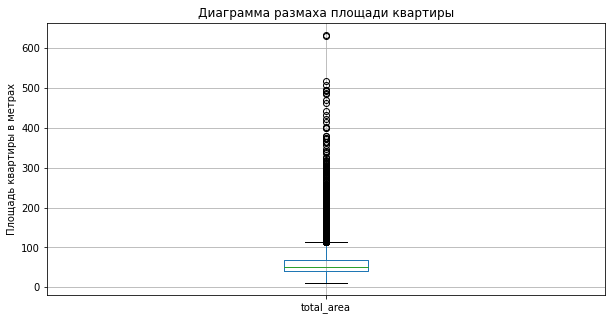

In [106]:
import matplotlib.pyplot as plt

data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.title('Диаграмма размаха площади квартиры')
plt.show()

In [107]:
data['total_area'].describe()
#увидим описание, т.к. квартили имеют довольно малый размер на получившейся диаграмме

count    23530.000000
mean        59.913619
std         33.608609
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        631.200000
Name: total_area, dtype: float64

Видим выбросы - после 150 кв метров.
Есть смысл их отбросить и взять только те объекты, площадь который не такая аномально высокая.

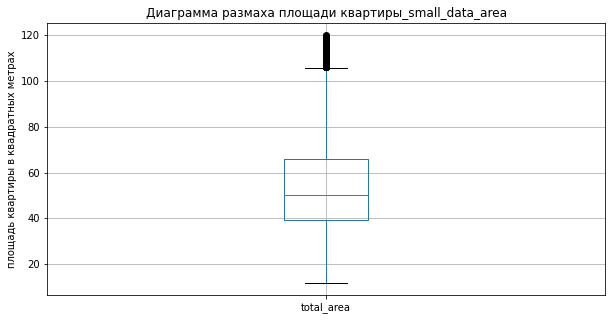

In [108]:
small_data_area = data.query('total_area < 120')
#создадим свою выборку с данными до 100 м2

small_data_area.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('площадь квартиры в квадратных метрах')
plt.title('Диаграмма размаха площади квартиры_small_data_area')
plt.show()

Теперь построим гистограммы для нового датафрейма

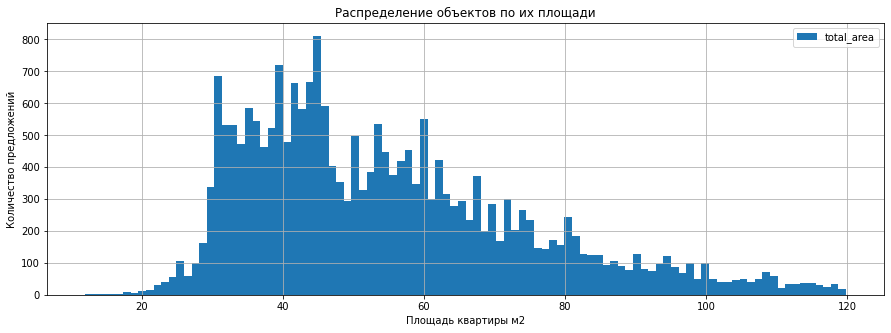

In [109]:
import numpy as np
from matplotlib import pyplot as plt 

small_data_area.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Распределение объектов по их площади',bins=100, figsize=(15,5), grid=True)

plt.xlabel('Площадь квартиры м2')
plt.ylabel('Количество предложений')
plt.show()

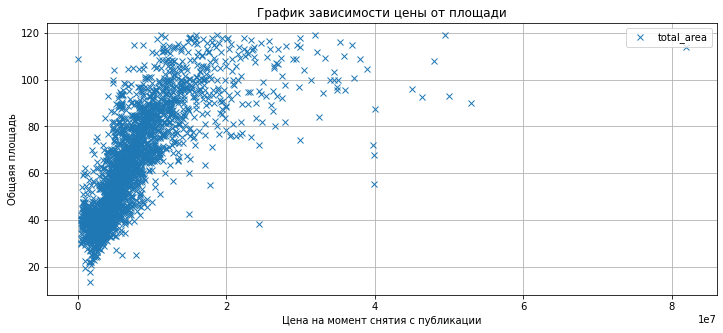

In [110]:
(small_data_area
    
     .pivot_table(index='last_price', values=['total_area'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Общаяя площадь')
plt.show()

In [111]:
print(data['last_price'].corr(data['total_area']))
#посчитаем коэ-т коррекляции

0.7512308269024259


По графику зависимости мы видим, что у квартир с малой площадью - до 100 кв.м - разброс цен невысокий. Почти все квартиры с малой площадью стоят одинаково.
С увеличением площади растет и разброс цен - тяжелее выявить зависимость, т.к. она уже будет зависеть и от других критериев, например ремонта, фантазии продавца, расположения и др.

Коэф-т корреляции довольно высок 0,75.

##### График зависимости цены от жилой площади

Ожидаем аналогичную зависимость исходя из близких по значению данных

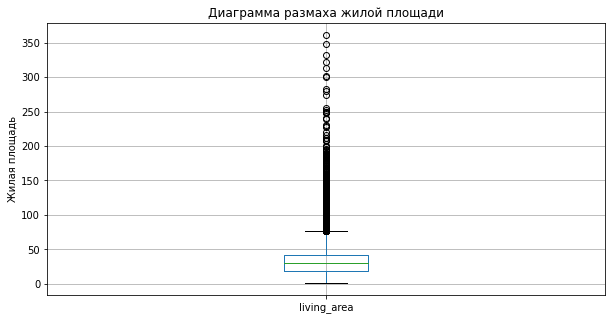

In [112]:
data.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('Жилая площадь')
plt.title('Диаграмма размаха жилой площади')
plt.show()

Да, ситуации схожи. Проверим на аналогичной выборке.

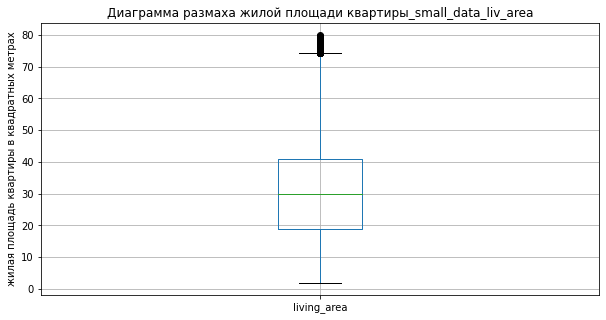

In [113]:
small_data_liv_area = data.query('living_area < 80')
#создадим свою выборку с данными

small_data_liv_area.boxplot(column=['living_area'], figsize=(10,5), grid=True)
plt.ylabel('жилая площадь квартиры в квадратных метрах')
plt.title('Диаграмма размаха жилой площади квартиры_small_data_liv_area')
plt.show()

In [114]:
data['living_area'].describe()
#увидим описание для интересеющего нас столбца

count    23530.000000
mean        34.327322
std         21.276751
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        360.332503
Name: living_area, dtype: float64

Построим график зависимости цены от жилой площади. Ожидаем схожие с предыдущим пунктом графики.

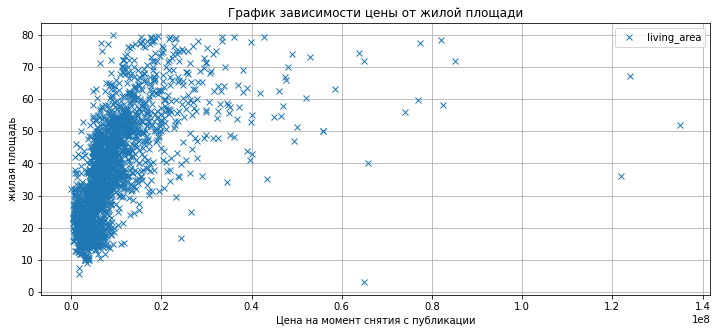

In [115]:
(small_data_liv_area
    
     .pivot_table(index='last_price', values=['living_area'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от жилой площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('жилая площадь')
plt.show()

In [116]:
print(data['last_price'].corr(data['living_area']))
#посчитаем коэ-т коррекляции

0.6755126367895425


Квартиры малой жилой площади - до 30 кв.м - почти не имеют разброса в цене, прослеживается линейная зависимость.
После 30 кв.м разброс цен начинает постепенно увиличиваться, предполагаю из-за влияния других параметров.

Коэф-т корреляции составляет 0,67

##### График зависимости цены от площади кухни

Кухни бывают разные, предполагаю, что при поиске квартиры лишь для небольшой части покупателей имеет значение площадь кухни

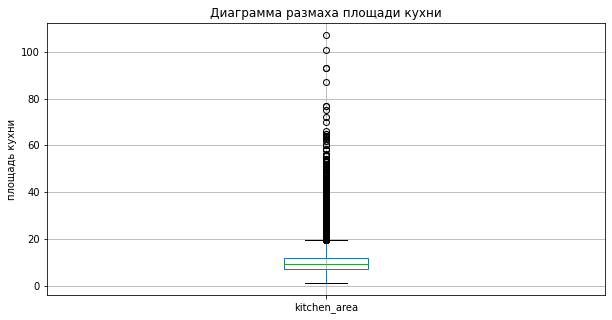

In [117]:
data.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('площадь кухни')
plt.title('Диаграмма размаха площади кухни')
plt.show()

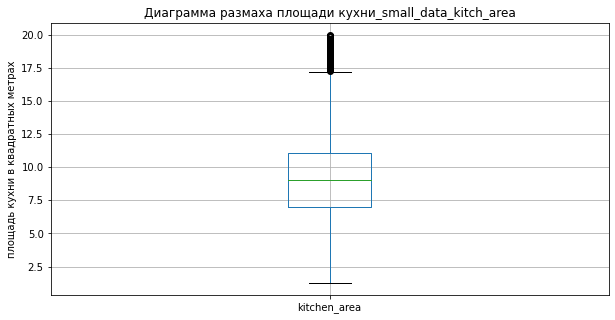

In [118]:
small_data_kitch_area = data.query('kitchen_area < 20')
#создадим свою выборку с данными

small_data_kitch_area.boxplot(column=['kitchen_area'], figsize=(10,5), grid=True)
plt.ylabel('площадь кухни в квадратных метрах')
plt.title('Диаграмма размаха площади кухни_small_data_kitch_area')
plt.show()

In [119]:
data['kitchen_area'].describe()
#увидим описание для интересеющего нас столбца

count    21312.000000
mean        10.526178
std          5.763067
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Построим график зависимости цены от площади кухни.

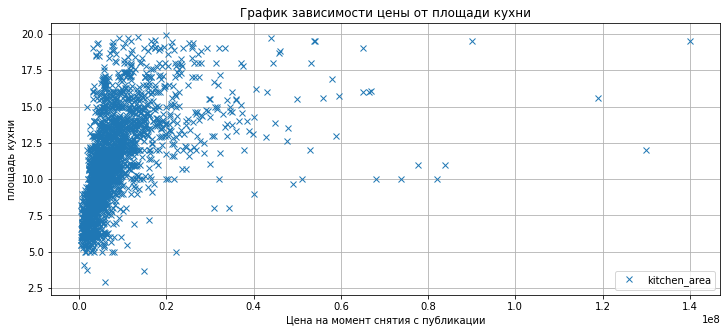

In [120]:
(small_data_kitch_area
    
     .pivot_table(index='last_price', values=['kitchen_area'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от площади кухни')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('площадь кухни')
plt.show()

In [121]:
print(data['last_price'].corr(data['kitchen_area']))
#посчитаем коэ-т коррекляции

0.5701891938671048


Коэ-т корреляции уже ниже, чем для жилой площади и общей площади и составляет 0,57.
Для объектов с площадью кухни до 10 м2 - цена практически одинакова, зависимость близка к прямой.
Для объектов с площадью кухни от 10 м2 -  разброс цен становится уже довольно широким, и зависимость отследить сложнее.

<div class="alert alert-block" style="background-color: gainsboro">
<g>Для каждого из видов площадей мы нашли коэффициент корреляции со стоимостью квартиры.
Самый высокий коэффициет оказался у жилой площади 0,75.
Для всех видов площадей построили график зависимости и провели анализ по диаграмме размаха</g>
</div>

#### График зависимости цены от количества комнат

Проведем анализ данных столбца по диаграмме размаха

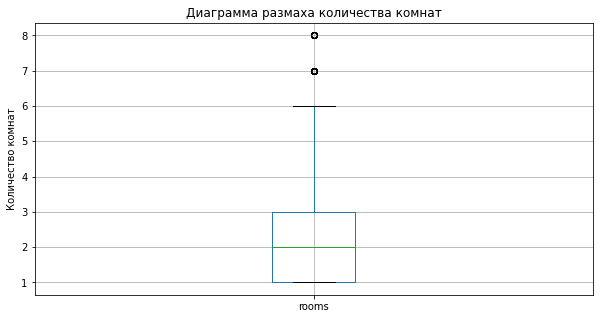

In [122]:
import matplotlib.pyplot as plt

data.boxplot(column=['rooms'], figsize=(10,5), grid=True)
plt.ylabel('Количество комнат')
plt.title('Диаграмма размаха количества комнат')
plt.show()

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Возьмем для анализа только те значения, которые обозначили в первом шаге анализа - т.е. отбросим те, которые редко встречаются.
</div>

In [123]:
data['rooms'].describe()

count    23530.000000
mean         2.069358
std          1.027416
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

In [124]:
print(data['last_price'].corr(data['rooms']))
#посчитаем коэ-т коррекляции

0.44427543115045715


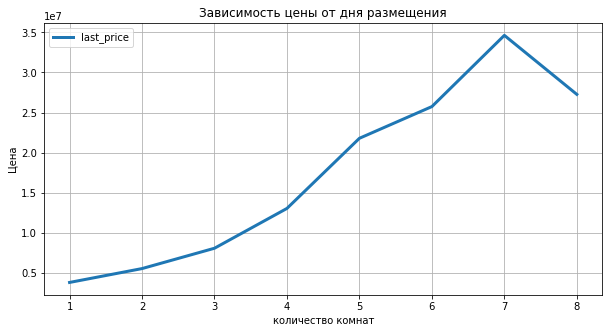

0.44427543115045715


In [125]:
(data
    
     .pivot_table(index='rooms', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от дня размещения')
)
plt.xlabel('количество комнат')
plt.ylabel('Цена')

plt.show()

print(data['last_price'].corr(data['rooms']))
#выясним коэ-т корреляции

По объектам с комнатностью меньше 8 - однозначно выражено, что стоимость квартиры растет с числом комнат в ней.
Коэфициент корреляции = 0,45.

#### График зависимости цены от вида этажа

Ранее мы создали столбец с видом этажа: group
Теперь посмотрим на зависимость цены от вида этажа

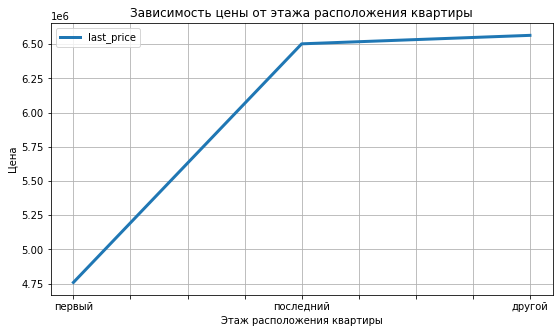

In [126]:
(data
     .pivot_table(index='group', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Получилось, что дороже всего квартиры на последних этажах. Самые дешевые квартиры на первом этаже.
Этот результат не ожидался, посмотрим, что может искажать картину.
Возможно на последних этажах где-то закрались неверные данные в цене за объект

In [127]:
data_floor = data[(data['group']=='последний')][['group','last_price','total_area','rooms','city_centers_nearest']]

print(data_floor.sort_values(by = 'last_price'))

           group  last_price  total_area  rooms  city_centers_nearest
8793   последний       12190       109.0      2                9176.0
14911  последний      430000        54.0      2                   NaN
21912  последний      470000        37.0      1                   NaN
23484  последний      470000        44.5      2                   NaN
10782  последний      490000        29.1      1                   NaN
...          ...         ...         ...    ...                   ...
21923  последний   115490000       235.0      5                1328.0
20264  последний   119000000       187.6      4                5605.0
20349  последний   124480000       267.7      4                7442.0
3117   последний   140000000       631.0      7                4972.0
12859  последний   140000000       631.2      7                4972.0

[3315 rows x 5 columns]


Наибольшая цена соответсвует объектам с большой площадью и количествам комнат.

На первом этаже самые дешевые квартиры. Многокомнатные квартиры на последних этажах с большими площадями - близки по ценам к объектам на других этажах.

#### График зависимости цены от высоты потолков

Ранее мы заменяли данные в этом столбце у крайне низких и высоких потолков на медианные. Посмотим на их текущее распределение.

In [128]:
data['ceiling_height'].describe()

count    14456.000000
mean         2.724242
std          0.270321
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Построим диаграмму зависимости цены от высоты потолков

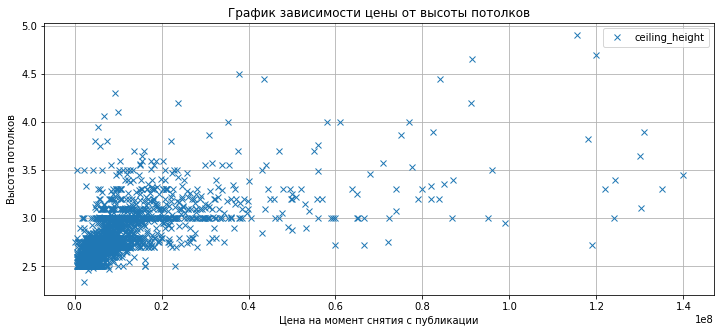

0.4603623650002964


In [129]:
(data
    
     .pivot_table(index='last_price', values=['ceiling_height'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от высоты потолков')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Высота потолков')
plt.show()

print(data['last_price'].corr(data['ceiling_height']))
#посчитаем коэ-т коррекляции

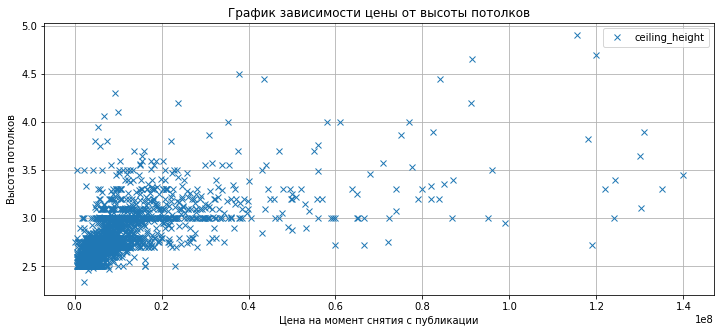

0.4603623650002964


In [130]:
small_data_ceiling_height = data.query('ceiling_height < 4')


(data
    
     .pivot_table(index='last_price', values=['ceiling_height'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от высоты потолков')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Высота потолков')
plt.show()

print(data['last_price'].corr(data['ceiling_height']))
#посчитаем коэ-т коррекляции

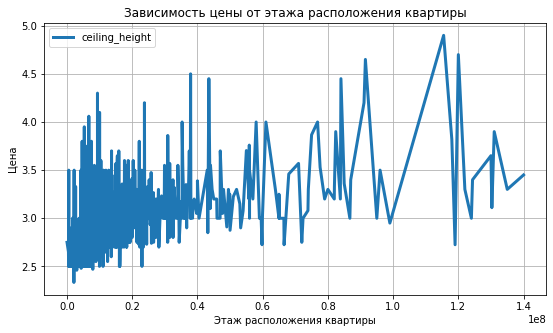

In [131]:
(data
     .pivot_table(index='last_price', values='ceiling_height').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Коэффициент корреляции = 0,46. Зависимость цены от высоты потолка достаточно сложно отслеживается, есть неявная зависимость, что чем выше потолок - тем выше цена, но таких данных в анализе достаточно мало, чтобы утверждать однозначно.

#### График зависимости цены от общего количества этажей в доме

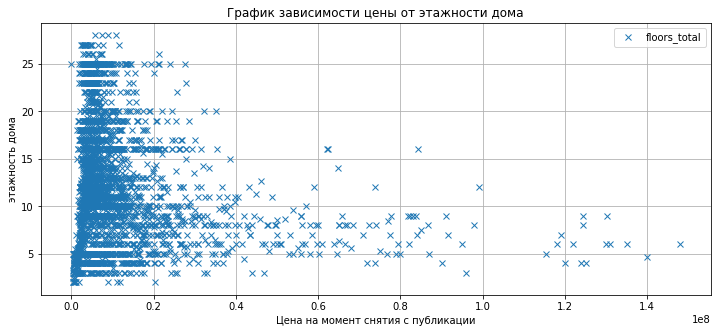

In [132]:
small_data_floors_total = data.query('floors_total < 30')

(small_data_floors_total
    
     .pivot_table(index='last_price', values=['floors_total'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от этажности дома')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('этажность дома')
plt.show()

In [133]:
print(data['last_price'].corr(data['floors_total']))
#посчитаем коэ-т коррекляции

-0.0015713387079327567


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23530 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23530 non-null  int64         
 1   last_price               23530 non-null  int64         
 2   total_area               23530 non-null  float64       
 3   first_day_exposition     23530 non-null  datetime64[ns]
 4   rooms                    23530 non-null  int64         
 5   ceiling_height           14456 non-null  float64       
 6   floors_total             23530 non-null  int64         
 7   living_area              23530 non-null  float64       
 8   floor                    23530 non-null  int64         
 9   is_apartment             23530 non-null  bool          
 10  studio                   23530 non-null  object        
 11  open_plan                23530 non-null  bool          
 12  kitchen_area             21312 n

Зависимость цены от этажа не отслеживается, наблюдается на графике широкий разброс цен для домов малой этажности - до 10 этажей. Коэффициент корреляции = -0,004

#### График зависимости цены от общего количества от расстояния до центра города в метрах

In [135]:
data['city_centers_nearest'].describe()
#проверим какие у нас есть значения в этом столбце

count    18029.000000
mean     14209.889844
std       8611.423117
min        181.000000
25%       9265.000000
50%      13108.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

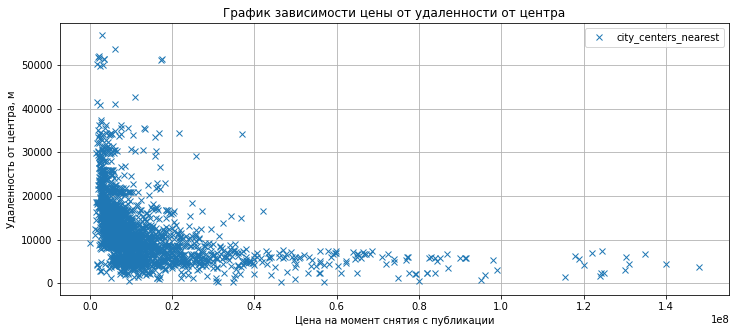

In [136]:
(data
    
     .pivot_table(index='last_price', values=['city_centers_nearest'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от удаленности от центра')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удаленность от центра, м')
plt.show()

In [137]:
print(data['last_price'].corr(data['city_centers_nearest']))
#выясним коэ-т корреляции

-0.27770885054404987


In [138]:
small_data_city_centers_nearest = data.query('city_centers_nearest < 8000')
#создадим свою выборку данных, где объекты находятся не более 8 км от центра

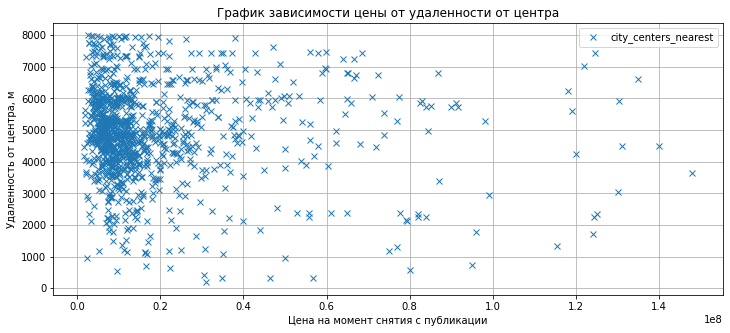

In [139]:
(small_data_city_centers_nearest
    
     .pivot_table(index='last_price', values=['city_centers_nearest'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от удаленности от центра')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удаленность от центра, м')
plt.show()

In [140]:
print(small_data_city_centers_nearest['last_price'].corr(data['city_centers_nearest']))
#выясним коэ-т корреляции

-0.05127974437941396


In [141]:
far_data_city_centers_nearest = data.query('city_centers_nearest > 8000')
#создадим другую выборку, с остальным значениями - более удаленными от центра объектами
print(far_data_city_centers_nearest['last_price'].corr(data['city_centers_nearest']))
#выясним коэ-т корреляции

-0.16769215925553377


По графикам видно, что линейной зависимости не прослеживается.
Для объектов, которые находятся на расстоянии до 8 км от центра - коэффициент составляет -0,05
Для более удаленных объектов - 0,17. Чем ближе к центру - тем больше разброс цен.

#### График зависимости цены от общего количества от расстояния до ближайшего парка

In [142]:
data['parks_nearest'].describe()
#проверим какие у нас есть значения в этом столбце

count    8004.000000
mean      490.883933
std       341.947922
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Построим график зависимость сначала для всех данных столбца

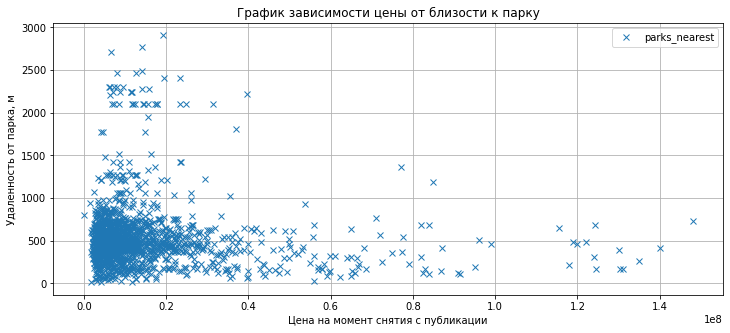

In [143]:
(data
    
     .pivot_table(index='last_price', values=['parks_nearest'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от близости к парку')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удаленность от парка, м')
plt.show()


In [144]:
print(data['last_price'].corr(data['parks_nearest']))

-0.020036169773099743


Корреляции нет, посмотрим на данные поближе

-0.059267672015655956


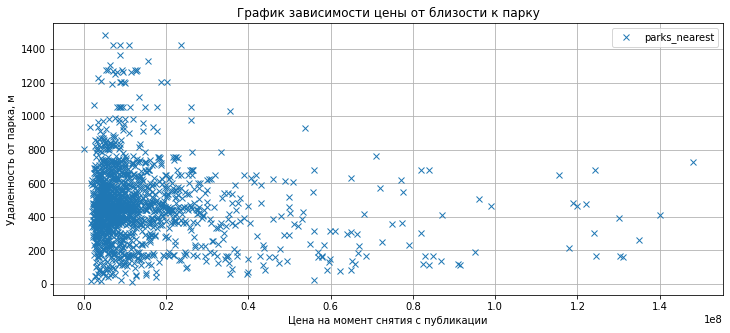

In [145]:
small_data_city_parks_nearest = data.query('parks_nearest < 1500')
#создадим другую выборку, с остальным значениями - более удаленными от центра объектами
print(small_data_city_parks_nearest['last_price'].corr(data['parks_nearest']))
#выясним коэ-т корреляции

(small_data_city_parks_nearest
    
     .pivot_table(index='last_price', values=['parks_nearest'])
     .plot(style='x',grid=True, figsize=(12, 5), title='График зависимости цены от близости к парку')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удаленность от парка, м')
plt.show()

Разброс данных о цене слишком высок, зависимости цены объекта от расстояния парка рядом не наблюдается.

#### График зависимости цены от даты размещения: дня недели, месяца и года

##### График зависимости цены от дня недели размещения

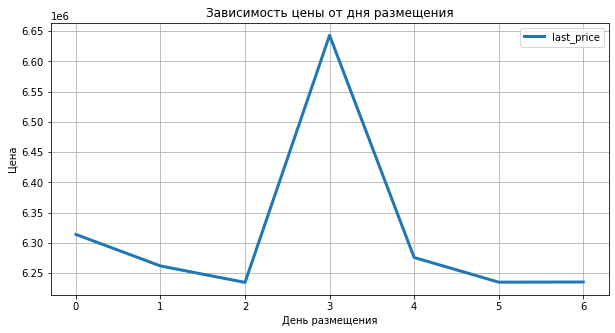

In [146]:
(data
    
     .pivot_table(index='day_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от дня размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

По  графику видно, что объявления опубликованные в четверг, продаются дороже, а дешевле всего продаются объекты, опубликованные в воскресение.

##### График зависимости цены от месяца размещения

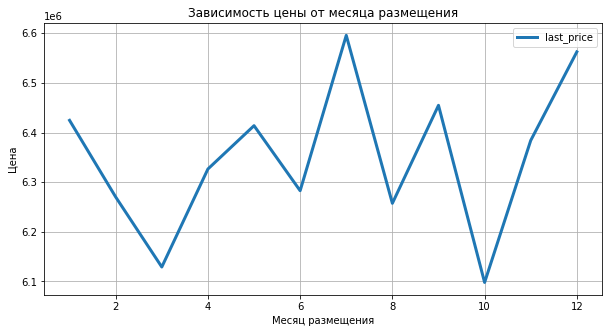

In [147]:
(data
    
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()


По графику видно, что дороже всего продаются квартиры, опубликованные в июле и декабре.

##### График зависимости цены от года размещения

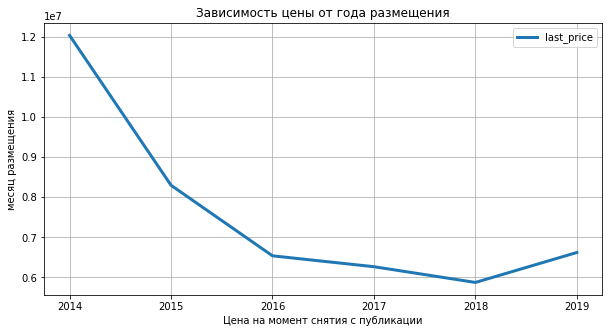

In [148]:
(data
    
     .pivot_table(index='years_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='Зависимость цены от года размещения')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('месяц размещения')
plt.show()

По графику мы видим, что падение цен на недвижимость начинается с 2014г, и только с 2018г цены начинают расти.

#### Выявление населенных пунктов с наибольшим числом объявления

In [149]:
data_top_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_top_10.columns=['Count_result']
data_top_10

,Count_result
locality_name,
санкт-петербург,15616
посёлок мурино,552
посёлок шушары,439
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307
деревня кудрово,299


Явный лидер - сам Санкт-Петербург, остальные поселения на несколько порядков ниже по числу объявлений.

#### Выявление цены за квадратный метр в населенных пунктах с наибольшим числом объевлений

Ранее мы уже создавали столбец price_meter с данными о стоимости квадратного метра, осталось вывести этот столбец для вышенайденных населенных пунктов

In [150]:
data_top_10['price_meter_mean'] = data.pivot_table(index='locality_name', values='price_meter', aggfunc='mean')
data_top_10_format=data_top_10.style.format({'price_meter_mean':'{:.2f}'})

In [151]:
data_top_10_format

,Count_result,price_meter_mean
locality_name,,
санкт-петербург,15616,114130.58
посёлок мурино,552,85629.11
посёлок шушары,439,78550.88
всеволожск,398,68654.01
пушкин,369,103125.37
колпино,338,75424.15
посёлок парголово,327,90175.49
гатчина,307,68745.69
деревня кудрово,299,92473.09


По стоимости квадратного метра лидируют Санкт-Петербург и Пушкин - более 100 000. Количество объявлений различается между этими городами на несколько порядков. Значит, количество объявлений точно не определяет стоимость жилья
Дешевле всего жилье в Выборге - 58000.



#### Выявление зависимости цены объекта от удаленности с центром города

Следуем инструкции к проекту: выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [152]:
#cначала создадим свой датафрейм с квартирами именно в Санкт-Петербурге
local_spb = data.loc[data['locality_name'] == 'санкт-петербург']

#удалим объекты у которых неизвестно расстояние до центра
local_spb=local_spb.dropna(subset=['city_centers_nearest'])

#проверим, что получилось
local_spb['city_centers_nearest_km'].describe()

count    15556.000000
mean        11.597583
std          4.847404
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

Диаграмма размаха удалённости от центра


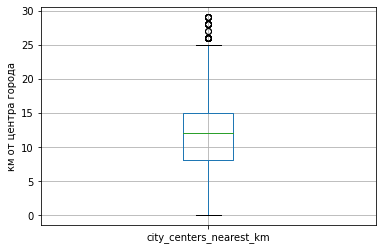

In [153]:
#Для нагляности построим диаграмму размаха
print('Диаграмма размаха удалённости от центра')
local_spb.boxplot('city_centers_nearest_km')

plt.ylabel('км от центра города')
plt.show()

In [154]:
#отсечем те данные, которые находятся за пределами "усов"
local_spb = local_spb.loc[local_spb['city_centers_nearest_km'] < 25]

In [155]:
#посчитаем среднюю цену для каждого км
mean_cost_km = local_spb['last_price'].sum()/local_spb['city_centers_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} '.format(mean_cost_km))

Средняя цена для каждого километра составляет 672265 


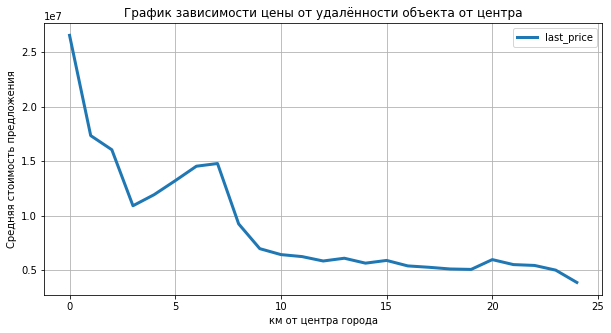

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,years_exposition,month_exposition,day_exposition,city_centers_nearest_km
count,15472.000000,1.547200e+04,15472.000000,15472.000000,10010.000000,15472.000000,15472.000000,15472.000000,14174.000000,15472.000000,...,15472.000000,7174.000000,15472.000000,7848.000000,13443.000000,15472.000000,15472.000000,15472.000000,15472.000000,15472.000000
mean,10.200556,7.743732e+06,64.122090,2.167464,2.760202,11.426706,36.848847,6.235975,11.081927,0.585639,...,0.625905,500.214943,0.768744,520.364169,182.688909,114105.503619,2017.349211,6.420954,2.558493,11.518873
std,5.750139,8.420958e+06,37.609432,1.083100,0.290685,6.364476,23.763926,4.887695,6.350138,0.968595,...,0.787594,344.873034,0.926298,280.583980,224.683249,44832.467271,1.056610,3.466539,1.779142,4.740302
min,0.000000,1.219000e+04,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,111.000000,2014.000000,1.000000,0.000000,0.000000
25%,6.000000,4.200000e+06,42.000000,1.000000,2.550000,6.000000,20.000000,3.000000,7.200000,0.000000,...,0.000000,300.250000,0.000000,292.750000,42.000000,91092.000000,2017.000000,3.000000,1.000000,8.000000
50%,10.000000,5.500000e+06,55.000000,2.000000,2.700000,9.000000,31.295000,5.000000,9.800000,0.000000,...,0.000000,463.000000,1.000000,504.500000,95.000000,104829.500000,2017.000000,6.000000,3.000000,12.000000
75%,14.000000,8.100000e+06,74.300000,3.000000,2.850000,16.000000,44.000000,8.000000,12.500000,1.000000,...,1.000000,620.000000,1.000000,739.250000,231.000000,124376.250000,2018.000000,10.000000,4.000000,15.000000
max,50.000000,1.480000e+08,631.200000,8.000000,4.900000,52.000000,360.332503,33.000000,107.000000,5.000000,...,3.000000,3190.000000,3.000000,1337.000000,1572.000000,995983.000000,2019.000000,12.000000,6.000000,24.000000


In [156]:
'''остроим график зависимости удалённости объектов от центра,
для более четкого понимания "центральности" района.'''

local_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости объекта от центра')
plt.xlabel('км от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

local_spb.describe()

Видим, что резкое снижение цен происходит с 4-ого и с 9-ого км (второй сильный спад) от центра (обозначим это условно-центральным районом), что вполне вероятно для такого большого города. Средняя стоимость жилья в этом районе 8 000 000. Чем дальше квартира от центра - тем она дешевле.

#### Изучение критерия как быстро продавались квартиры (столбец days_exposition)

Диаграмма размаха времени продажи квартиры


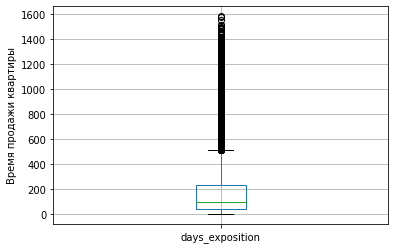

count    20367.000000
mean       180.538862
std        219.462370
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [157]:
#построим диаграмму размаха, для определения быстроты продажи квартиры
print('Диаграмма размаха времени продажи квартиры')
data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

data['days_exposition'].describe()

Отсчем те значения, которые являются выбросами - предполагаю, что это квартиры с большой площадью или специфичным ремонтом или наоборот ветхие объекты в домах со старыми коммуникациями, которые продавались достаточно долго

In [158]:
small_data_exposition = data.query('days_exposition < 400')
small_data_exposition['days_exposition'].agg(['mean','median'])

mean      111.042876
median     77.000000
Name: days_exposition, dtype: float64

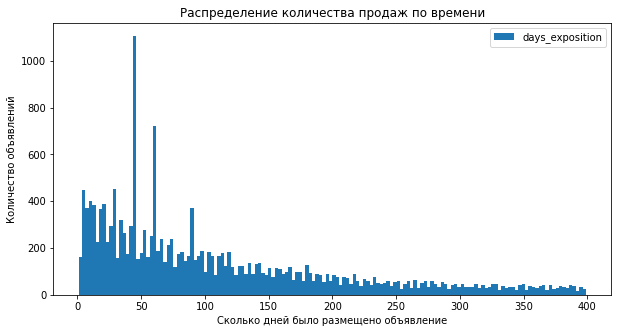

In [159]:
small_data_exposition.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=150, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

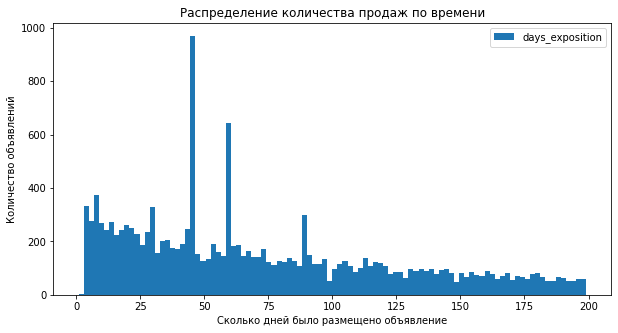

In [160]:
#посмотрим еще ближе диаграмму
smallw_data_exposition = data.query('days_exposition < 200')
smallw_data_exposition['days_exposition'].agg(['mean','median'])

smallw_data_exposition.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

В среднем продажа среднестатистичекой квартиры занимает 60-90 дней.
Быстрой продажей можно назвать продажи в пределах месяца.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно!
</div>

### Общий вывод

Выводы по исследованию изначальных данных на первом шаге:

Большинство объектов находятся на расстоянии от 10 до 26 км от аэропорта, 
также достаточно много объектов на расстоянии от 30 до 38 км от аэропорта. 
Рядом (до 10 км) с аэропортом объектов не представлено.
Примерно поровну представлено объектов с одним, двумя балконами или без балконов. (из тех данных, где это поле вообще заполнено).Есть также большие аппартаменты с 3,4 или 5 балконами, как ни странно, оъектов с 5-ю балконами больше, чем с 3-мя или 4-мя.
Большая часть данных у нас входит в стандартные высоты потолков 2.5 - 3.3 Но есть и объекты с более высокими потолками, они, скорее, единичные.
Большая часть объектов была на расстоянии от центра 11-18 км. Достаточно много объектов было прямо в центре города и вблизи центра(до 8 км)
Большинство объявлений закрывались в переделах 3-4 месяцев.
Но есть и такие, которые вероятно публиковались уже не первый год.
Большинство объявлений о продаже были по квартирам, находящимся на 1-5-ом этажах.
Второй по величине является группа с объектами на 6-9 этажах.
Большинство объявлений о продаже были в 5-ти этажных домах и высотках до 12 этажей.
Большинство объявлений были с метражом кухни от 4 до 15 м2.
Больше всех продано квартир с жилой площадью от 15 до 18 м2, а также с площадью от 27 до 33 м2.
Основная часть данных содержит информацию о продаже квартир с общей площадью 15 до 50 м2.
В большинстве указанных данных по объектам - парков рядом нет.
В 5681 объектах рядом 1 парк, в 1747 - 2, и у 647 объектов рядом два парка, ближайший парк находится на расстоянии от 200 до 700 метров.
В выборке большую часть объектов представлено без доступности к водоемам.
Почти у 6000 квартир рядом есть 1 водоем, у 2000 есть рядом два водоема и 1501 объекта рядом целых 3 водоема. Из тех квартир, которые имеют рядом водоем  - почти все находятся на расстоянии 1 км от ближайшего водоема.
Почти в равной степени представлены однокомнтаные и двух комнатные квартиры в нашей выборке.
Почти 6000 из 23000 это трех комнатные квартиры, 1200 четрырехкомнатные квартиры.
Многокомнатные квартиры представлены числом на порядок ниже.
Большая часть объектов представлена с общей площадью от 30 до 75 м2. Есть два пика, видимо типовых застроек, с наибольшим количеством объектов жилой площадью: 33 м2 и 44-46 м2.

Выводы по второму шагу проекта - предобработке данных:


Мы смогли сократить количество пропущенных значений без существенных искажений для анализа в дальнейшем.
Исходя из объема проделанной работы можно сказать что существеннная часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует из-за необязательности заполнения полей, рекомендуется сделать запрос на выяснение причин почему отсустсвуют так много данных, которые должны были быть заполнены автоматически.

Для большей достоверности по уже имеющимся данным были проделаны следующие действия:
Столбец first_day_exposition был приведен к формату: '%Y-%m-%dT%H:%M:%S'
Изменено значение расстояния до аэропорта, равное нулю, на неизвестное.
Изменен тип значений в столбце ponds_around3000 на int
Изменен тип значений в столбце этажности домов на int
Изменено название столбца cityCenters_nearest на city_centers_nearest
Добавлены значения False в столбец is_apartment 
Добавлены значения 0 в столбец studio
Изменено значение в столбце rooms, равное нулю, на 1
Аномально низкие и аномально высокие потолки в столбце ceiling_height заменены на медианные значения
Изменен тип значений в столбце balcony на int, отсуствующие данные заменены на 0
Изменен тип значений в столбце last_price на int
Добавлены медианные значения в столбец living_area, вместо отсуствующих
Изменены значения в столбце locality_name: приведены к нижнему регистру, поселок заменен на посёлок, заменены значения в парах: 'городской посёлок' - 'посёлок городского типа''садовое товарищество'- 'садоводческое некоммерческое товарищество''посёлок станции'-'посёлок при железнодорожной станции'.
Удалены строки без названия поселения

Выводы по третьем шагу проекта - добавлению столбцов:
Были добавлены столбцы со стоимостью жилья за 1 квадратный метр, добавили тип этажа объекта: первый/последний/другой. Добавили столбцы с днем недели, месяцем и годом публикации объявления, также был добавлен столбец с расстоянием от объекта до центра города в км.

В четвертом шаге проекта был проведен исследовательский анализ обработанных данных, на его основе можно сделать следующие выводы:

У квартир с малой площадью - до 100 кв.м - разброс цен невысокий. Почти все квартиры с малой площадью стоят одинаково.
С увеличением площади растет и разброс цен - тяжелее выявить зависимость, т.к. стоимость уже может зависеть и от других критериев. Коэф-т корреляции между этими критериями довольно высок 0,75.

Квартиры малой жилой площади - до 30 кв.м - почти не имеют разброса в цене, прослеживается линейная зависимость.
После 30 кв.м разброс цен начинает постепенно увиличиваться, предполагаю из-за влияния других параметров.
Коэф-т корреляции составляет 0,67.

Коэ-т корреляции для зависимости цены от площади кухни уже ниже, чем для жилой площади и общей площади и составляет 0,57.
Для объектов с площадью кухни до 10 м2 - цена практически одинакова, зависимость близка к прямой.
Для объектов с площадью кухни от 10 м2 -  разброс цен становится уже довольно широким, и зависимость отследить сложнее.

Наилучшим критерием выявления зависимости цены является - общая площадь объекта.

По объектам с комнатностью меньше 8 - однозначно выражено, что стоимость квартиры растет с числом комнат в ней.
Коэфициент корреляции = 0,45.

На первом этаже самые дешевые квартиры. Многокомнатные квартиры на последних этажах с большими площадями - близки по ценам к объектам на других этажах.

Зависимость цены от высоты потолка достаточно сложно отслеживается, есть неявная зависимость, что чем выше потолок - тем выше цена, но таких данных в анализе достаточно мало, чтобы утверждать однозначно. Коэффициент корреляции = 0,46. 

Зависимость цены от этажа не отслеживается, наблюдается на графике широкий разброс цен для домов малой этажности - до 10 этажей. Коэффициент корреляции = -0,004

Видим, что резкое снижение цен происходит с 4-ого и с 9-ого км (второй сильный спад) от центра (обозначим это условно-центральным районом), что вполне вероятно для такого большого города. Средняя стоимость жилья в этом районе 8 000 000. Чем дальше квартира от центра - тем она дешевле. Чем ближе к центру - тем больше разброс цен.

Зависимости цены объекта от расстояния парка рядом не наблюдается.

Наилучшим критерием выявления зависимости цены является - общая площадь объекта, комнатность, этажность.

Дороже всего продаются квартиры, опубликованные в декабре и июле.
Объявления опубликованные в четверг, продаются дороже, а дешевле всего продаются объекты, опубликованные в воскресение.  
Падение цен на недвижимость начинается с 2014г, и только с 2018г цены начинают расти.
Явный лидер по количеству объектов в выборке - сам Санкт-Петербург, остальные поселения на несколько порядков ниже по числу объявлений.
По стоимости квадратного метра лидируют Санкт-Петербург и Пушкин - более 100 000 за м2. Количество объявлений различается между этими городами на несколько порядков. Значит, количество объявлений точно не определяет стоимость жилья. Дешевле всего жилье в Выборге - 58000 тыс / м2.
Средняя цена для каждого километра от центра составляет 700005.
Видим, что резкое снижение цен происходит с 9 км от центра, что вполне вероятно для такого большого города. Средняя стоимость жилья в этом районе 8 000 000. 
В среднем продажа среднестатистичекой квартиры занимает 60-90 дней.
Быстрой продажей можно назвать продажи в пределах месяца.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод